In [1]:
from __future__ import print_function, division
!pip install tensorflow

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import torch
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential

import torch.backends.cudnn as cudnn
cudnn.benchmark = True
print("GPU: " + str(torch.cuda.is_available()))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
GPU: True


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR100 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert pixel values to float data type and normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

data = []
data.extend(x_train)
data.extend(x_test)
data_min = np.min(data, axis=(1,2), keepdims=True)
data_max = np.max(data, axis=(1,2), keepdims=True)

scaled_data = (data - data_min) / (data_max - data_min)

#push normalized data back to x_train and x_test
x_train = scaled_data[:len(x_train)]
x_test = scaled_data[len(x_train):]

# make labels categorical
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


170498071/170498071 [==============================] - 13s 0us/step


In [3]:
#from chat gpt
from tensorflow.keras.applications.vgg16 import VGG16
# Load VGG16 model with pretrained weights
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = vgg16.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16.input, outputs=predictions)

58889256/58889256 [==============================] - 3s 0us/step
<class 'keras.engine.functional.Functional'>
<class 'keras.engine.functional.Functional'>


In [4]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#go to github and use a simple resnet/alexnet as a benchmark  

history = model.fit(x_train, y_train, batch_size= 100, epochs=10, validation_data=(x_test, y_test))

model.summary()

Epoch 1/10
500/500 [==============================] - 45s 49ms/step - loss: 1.9578 - accuracy: 0.2255 - val_loss: 1.5979 - val_accuracy: 0.3376
Epoch 2/10
500/500 [==============================] - 26s 52ms/step - loss: 1.3900 - accuracy: 0.4701 - val_loss: 1.1711 - val_accuracy: 0.5924
Epoch 3/10
500/500 [==============================] - 25s 49ms/step - loss: 0.9919 - accuracy: 0.6599 - val_loss: 0.9189 - val_accuracy: 0.6966
Epoch 4/10
500/500 [==============================] - 24s 49ms/step - loss: 0.7775 - accuracy: 0.7392 - val_loss: 0.9255 - val_accuracy: 0.7066
Epoch 5/10
500/500 [==============================] - 26s 52ms/step - loss: 0.6314 - accuracy: 0.7912 - val_loss: 0.8386 - val_accuracy: 0.7286
Epoch 6/10
500/500 [==============================] - 25s 49ms/step - loss: 0.5337 - accuracy: 0.8255 - val_loss: 0.6947 - val_accuracy: 0.7775
Epoch 7/10
500/500 [==============================] - 24s 49ms/step - loss: 0.4557 - accuracy: 0.8501 - val_loss: 0.6722 - val_accuracy:

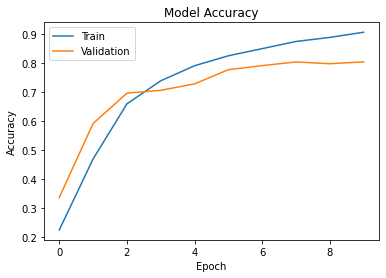

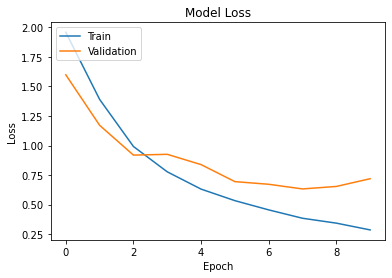

In [5]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
import matplotlib.pyplot as plt

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [6]:
pred_train= model.predict(x_train)
scores = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(x_test)
scores2 = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

1563/1563 [==============================] - 11s 7ms/step
Accuracy on training data: 0.9295600056648254 
 Error on training data: 0.07043999433517456
313/313 [==============================] - 2s 7ms/step
Accuracy on test data: 0.8046000003814697 
 Error on test data: 0.19539999961853027


In [7]:
# BONUS Deep features + MLP classification task
# 1.	Train DCNN
# 2.	Cut off the FC layers (equivalent to MLP)
# 3.	Replace the old FC layers with a generic MLP
# 4.	Retrain the model


# Unfortunately I cannot cut off the FC layers for the Functional type model that
# I am currently relying on. So I built a Sequential Model that copied the VGG16
# convolutional layers and the slapped some FC layers on the end.

In [8]:
# Create a new sequential model
new_model = Sequential()

# Add the convolutional layers of the VGG16 model
for layer in vgg16.layers[:-4]:
    new_model.add(layer)

# Add fully connected layers
new_model.add(Flatten())
new_model.add(Dense(4096, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(4096, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#go to github and use a simple resnet/alexnet as a benchmark  

history = new_model.fit(x_train, y_train, batch_size= 100, epochs=10, validation_data=(x_test, y_test))

new_model.summary()

Epoch 1/10
500/500 [==============================] - 26s 45ms/step - loss: 0.3313 - accuracy: 0.9024 - val_loss: 0.7994 - val_accuracy: 0.7975
Epoch 2/10
500/500 [==============================] - 22s 43ms/step - loss: 0.2791 - accuracy: 0.9168 - val_loss: 0.8218 - val_accuracy: 0.8070
Epoch 3/10
500/500 [==============================] - 22s 43ms/step - loss: 0.2635 - accuracy: 0.9197 - val_loss: 0.8186 - val_accuracy: 0.7909
Epoch 4/10
500/500 [==============================] - 22s 43ms/step - loss: 0.2488 - accuracy: 0.9240 - val_loss: 0.7444 - val_accuracy: 0.7993
Epoch 5/10
222/500 [============>.................] - ETA: 11s - loss: 0.2391 - accuracy: 0.9278

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
import matplotlib.pyplot as plt

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pred_train= new_model.predict(x_train)
scores = new_model.evaluate(x_train, y_train, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= new_model.predict(x_test)
scores2 = new_model.evaluate(x_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

In [ ]:
# BONUS SIFT features + MLP classification task

In [ ]:
import cv2, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from itertools import chain
from PIL import Image

In [ ]:
print(len(x_train), len(x_test))

In [ ]:
# Generate SIFT Features
print('generating sift feautures')
sift = cv2.SIFT_create()
dico = []

for img in chain(x_train, x_test):

    img = (img * 255).astype(np.uint8) # convert to 8-bit integers
    kp, des = sift.detectAndCompute(img, None)
    if des is not None:
      for d in des:
          dico.append(d)

batch_size = len(x_train) * 3

kmeans = MiniBatchKMeans(n_clusters=10*10, batch_size=batch_size, verbose=1).fit(dico)


kmeans.verbose = False

In [ ]:
histo_list = []

for img in chain(x_train, x_test):
    img = (img * 255).astype(np.uint8) # convert to 8-bit integers
    kp, des = sift.detectAndCompute(img, None)
    histo = np.zeros(10*10)
    nkp = np.size(kp)

    if des is not None:
      for d in des:
          idx = kmeans.predict([d])
          histo[idx] += 1/nkp # Because we need normalized histograms, I prefered to add 1/nkp directly

    histo_list.append(histo)

X = np.array(histo_list)

In [ ]:
mlp = MLPClassifier(verbose=True, max_iter=600000)
mlp.fit(X[:50000], y_train)

predicitions = mlp.predict(X[50000:])
print(classification_report(y_test, predicitions))

fig, axes = plt.subplots(1, 1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show(block=True)